## Problem: En yakın lokasyon uzaklığı bulma
MxN boyutlarındaki bir koordinat sistemi üzerinde yer alan belirsiz sayıdaki lokasyonlara ilişkin lokasyon türü (H:hastane, L:lokanta, P:park v.b.), x koordinatı ve y koordinatı verileri “lokasyonlar.txt” isimli sıradan erişimli bir dosyada tutulmaktadır. Örnek bir dosya içeriği aşağıda verilmiştir:
```
P,1,1  
H,1,8  
L,2,5  
L,2,6  
L,7,5  
P,8,9  
```
“lokasyonlar.txt” dosyasındaki verileri kullanarak, kullanıcının bu koordinat sistemi üzerinde
* belirli bir türde kaç lokasyon bulunduğunu
* bu türdeki lokasyonlardan kendisine en yakın olanının konumunu (x ve y koordinatlarını)
* bu lokasyonun kendisine olan uzaklığını (öklit uzaklığı) 

öğrenmesini sağlayacak bir program/algoritma yazınız. 

"lokasyonlar.txt" dosyasındaki verilerin koordinat üzerinde yerleşimi:

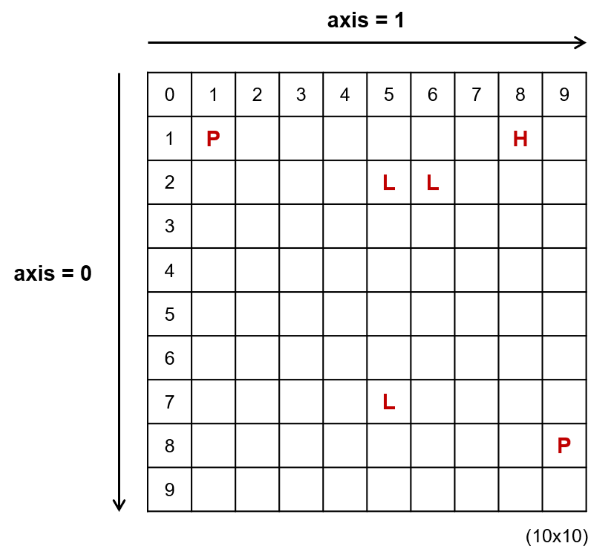

### 1. "lokasyonlar.txt" dosyasını oku

In [26]:
import numpy as np

In [27]:
M,N = 10,10
#a = # TODO: create an MxN array initialized with empty string (''). hint: use np.full()
a=np.full((M,N),fill_value='')
with open("lokasyonlar.txt") as file:
    for line in file:
        tip, x, y = line.strip().split(",")
        # TODO: assign location type to the corresponding coordinate of the array a
        a[int(x),int(y)]=tip
print(a)

[['' '' '' '' '' '' '' '' '' '']
 ['' 'P' '' '' '' '' '' '' 'H' '']
 ['' '' '' '' '' 'L' 'L' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' 'L' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' 'P']
 ['' '' '' '' '' '' '' '' '' '']]


### 2. Kullanıcının bulunduğu konumu al

In [28]:
x, y = input("Bulunduğunuz konumun x ve y koordinatlarını giriniz: ").split(",")
x, y = int(x), int(y)
#current = # TODO: create an np.array for current location
current=np.array([x,y])

Bulunduğunuz konumun x ve y koordinatlarını giriniz:  4,2


In [29]:
current

array([4, 2])

### 3. Uzaklık hesaplayan fonksiyonu yaz
* Fonksiyon, kullanıcının bulunduğu konum ile diğer belirli tipteki lokasyonların konumu arasındaki uzaklıkları bulmaktadır. 
* Fonksiyon parametreleri ndarray tipindedir.
* `other_locs` ndarray'inin shape'i ```(X,2)``` şeklindedir.

* Burada bi eksik var? Oklit mesafe hesabi formulu eksik ama zaten biliyorsun.

In [30]:
def distance(current_loc, other_locs):
    #dists = # TODO: calculate euclidean distances between current user location and other locations
    dists=np.sqrt(np.sum((other_locs-current_loc)**2,axis=1))
    return dists

yapilanlar: broadcasting ile other'daki tum degerlerden current i cikardi. Sonra bunlarin karelerini aldi. Sonra bunlarin satirlarda topladi. En son da karekokunu aldi.

### 4. İstenen bilgileri listele

In [ ]:
location_type = input("Bulmak istediğiniz lokasyon türünü giriniz (çıkış için Q/q): ").upper()

while location_type not in ['Q','q']:
    #indices = # TODO: find all the coordinates of the given location type. hint: use np.argwhere() **Verilen lokasyon turune ait koordinantlari cek.
    indices=np.argwhere(a==location_type) #?
    print(location_type,"türü lokasyon sayısı:",indices.shape[0]) #veya len(indices) # TODO)
    
    distances = distance(current, indices)
    min_index =np.argmin(distances) # TODO: find the index of the minimum distance 
    print("En yakın",location_type,"türü lokasyonun konumu:",indices[min_index]) # TODO) **indices'te o ture ait mx2 lik koordinantlar var. min indexte bunun hangi satir oldugu var.
    print("En yakın",location_type,"türü lokasyonun kullanıcıya uzaklığı:",distances.min())# TODO)
    
    location_type = input("Bulmak istediğiniz lokasyon türünü giriniz (çıkış için Q/q): ")

Bulmak istediğiniz lokasyon türünü giriniz (çıkış için Q/q):  P


P türü lokasyon sayısı: 2
En yakın P türü lokasyonun konumu: [1 1]
En yakın P türü lokasyonun kullanıcıya uzaklığı: 3.1622776601683795
